## EDA : Explore and clean the data

Goal: understand the dataset, clean it, create basic plots, save cleaned files and visuals.

Why: If the data is dirty (cancellations, negatives, missing CustomerID) everything else will be wrong.

"Let me look at my data, clean it, and understand it.”

Load dataset from /data/OnlineRetailDataSet.csv.

Check missing values, duplicates.

Clean the data (drop empty, fix datatypes).

Create simple visuals: top  countries, sales over time, best-selling products.


## Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-v0_8")


## Load clean dataset


Read CSV into data

In [9]:
#Load Dataset

# Load CSV
data = pd.read_csv("../data/OnlineRetailDataSet.csv", encoding='utf-8-sig')

# Quick overview
print(data.head())
print(data.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  1/12/2010 8:26       2.55     17850.0  United Kingdom  
1  1/12/2010 8:26       3.39     17850.0  United Kingdom  
2  1/12/2010 8:26       2.75     17850.0  United Kingdom  
3  1/12/2010 8:26       3.39     17850.0  United Kingdom  
4  1/12/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

## Data Cleaning

In [10]:


# Convert InvoiceDate to datetime safely
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], dayfirst=True, errors='coerce')

# Drop invalid dates
data = data.dropna(subset=['InvoiceDate'])

# Remove cancelled orders (InvoiceNo starting with 'C')
data = data[~data['InvoiceNo'].str.startswith('C')]

# Drop rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Add TotalPrice column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']



# Check shape
data.shape


(168649, 9)

In [11]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
data.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

## Dataset Overview

Also check number of unique values for important columns

In [13]:

print("Unique customers:", data['CustomerID'].nunique())
print("Unique invoices:", data['InvoiceNo'].nunique())
print("Unique products:", data['Description'].nunique())


print(data.info())
print(data.describe())


Unique customers: 2997
Unique invoices: 7962
Unique products: 3686
<class 'pandas.core.frame.DataFrame'>
Index: 168649 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    168649 non-null  object        
 1   StockCode    168649 non-null  object        
 2   Description  168649 non-null  object        
 3   Quantity     168649 non-null  int64         
 4   InvoiceDate  168649 non-null  datetime64[ns]
 5   UnitPrice    168649 non-null  float64       
 6   CustomerID   168649 non-null  float64       
 7   Country      168649 non-null  object        
 8   TotalPrice   168649 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 12.9+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  168649.000000                         168649  168649.000000   
mean       13.081726  2011-07-01 16:52:37.624652544

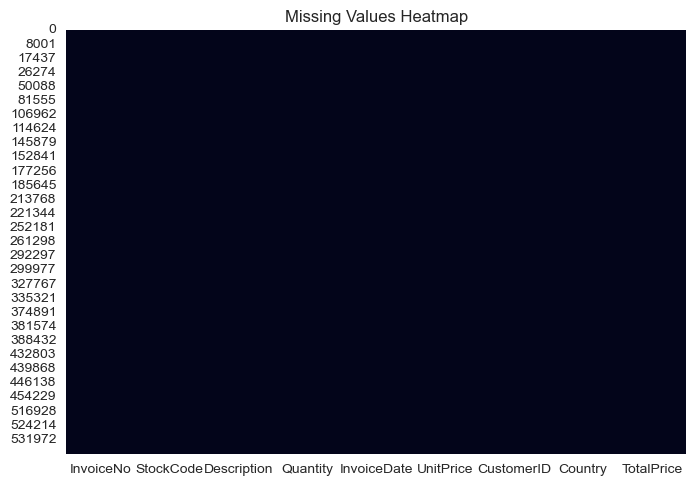

In [18]:
#Missing Values Check

(data.isnull().sum() / len(data) * 100).sort_values(ascending=False)

sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.savefig("../visuals/missing_values.png", dpi=150)
plt.show()



## Sales Over Time

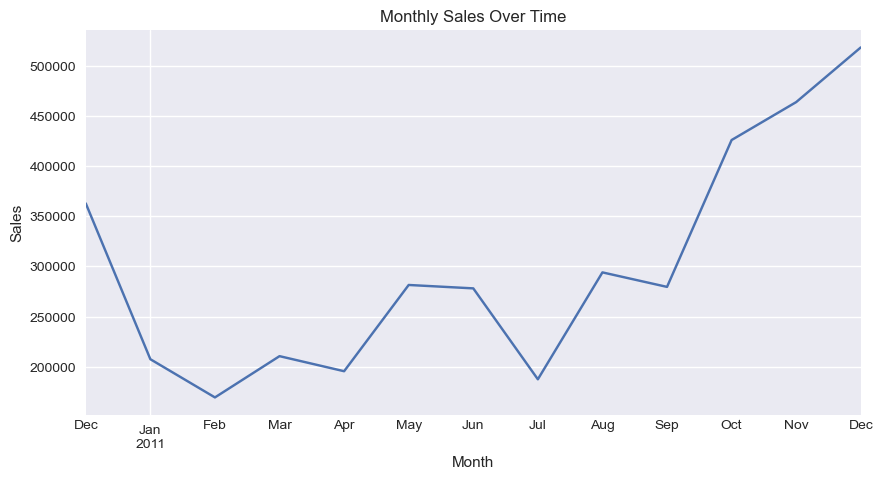

In [15]:
# Ensure InvoiceDate is datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Add TotalPrice column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Aggregate sales by month
monthly_sales = data.groupby(data['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()

monthly_sales.plot(kind='line', figsize=(10,5))
plt.title("Monthly Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.savefig("../visuals/monthly_sales.png", dpi=150)
plt.show()


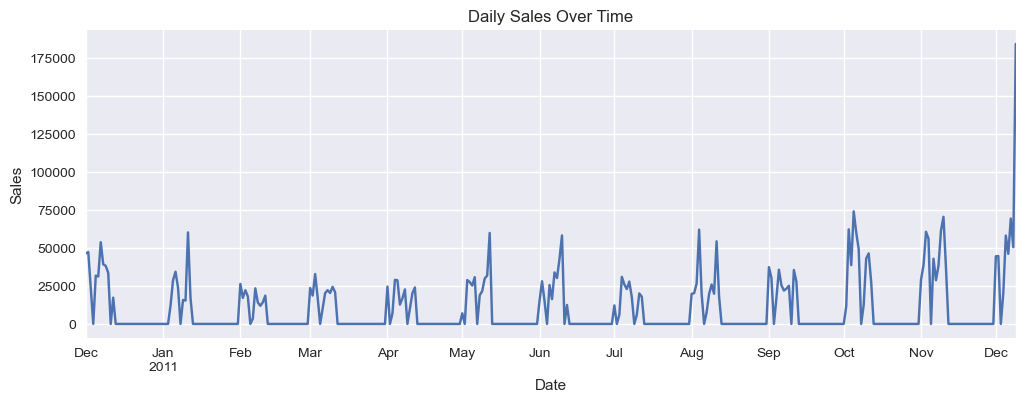

<Axes: xlabel='InvoiceDate'>

In [16]:
#daily sales

daily_sales = data.set_index('InvoiceDate').resample('D')['TotalPrice'].sum()
daily_sales.plot(figsize=(12,4))
plt.title("Daily Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.savefig("../visuals/daily_sales.png", dpi=150)
plt.show()

monthly_sales.rolling(3).mean().plot()


## Top Products

find best-selling SKUs and what to promote.

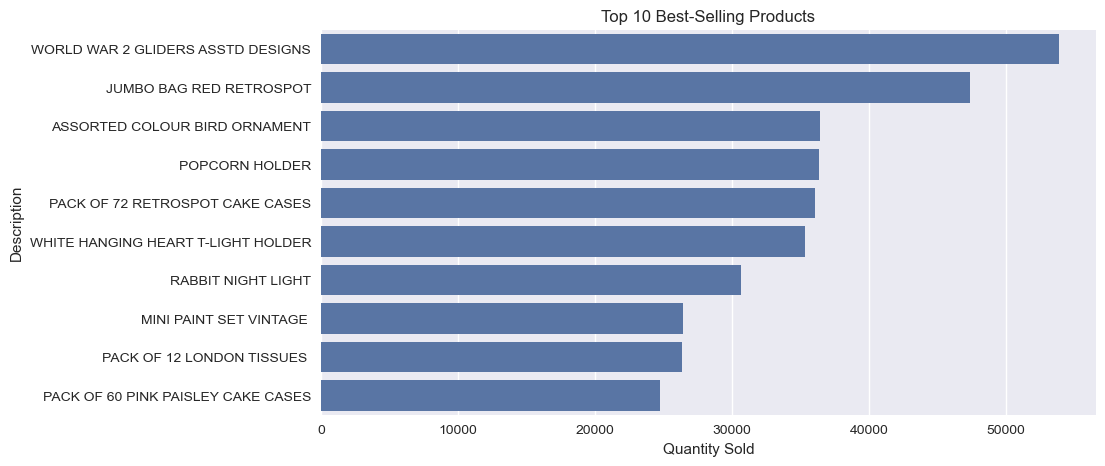

In [12]:
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.savefig("../visuals/top_products.png", dpi=150)
plt.show()


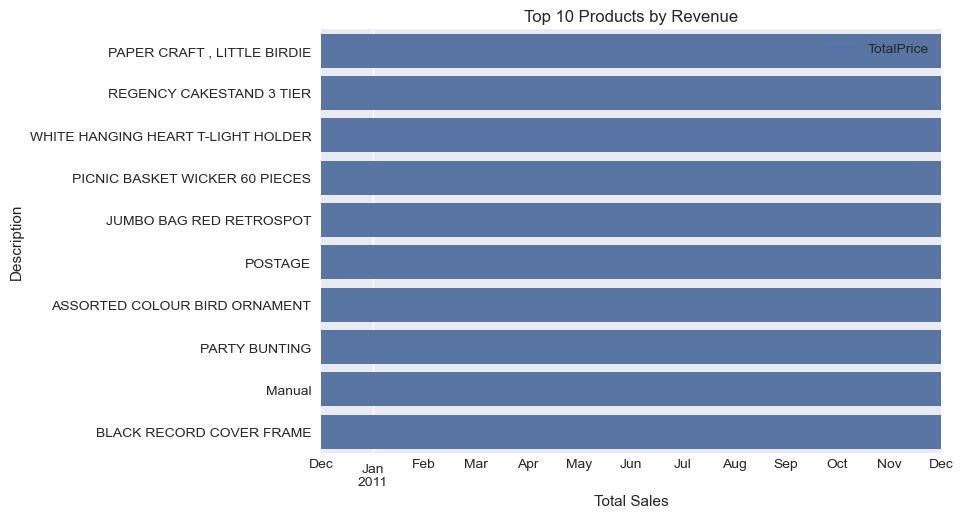

In [17]:
#Top products by revenue

top_products_sales = data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products_sales.values, y=top_products_sales.index)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Sales")
plt.savefig("../visuals/top_products_revenue.png", dpi=150)
plt.show()


## Sales by Country

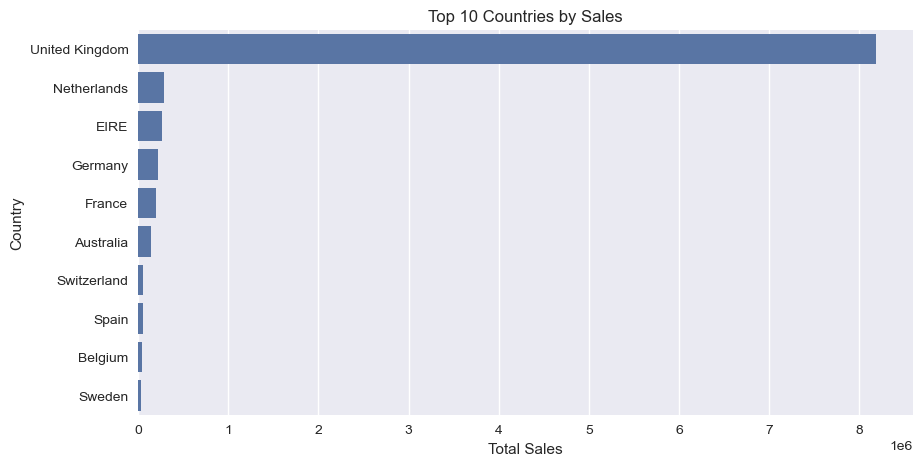

In [13]:
country_sales = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title("Top 10 Countries by Sales")
plt.xlabel("Total Sales")
plt.savefig("../visuals/country_sales.png", dpi=150)
plt.show()


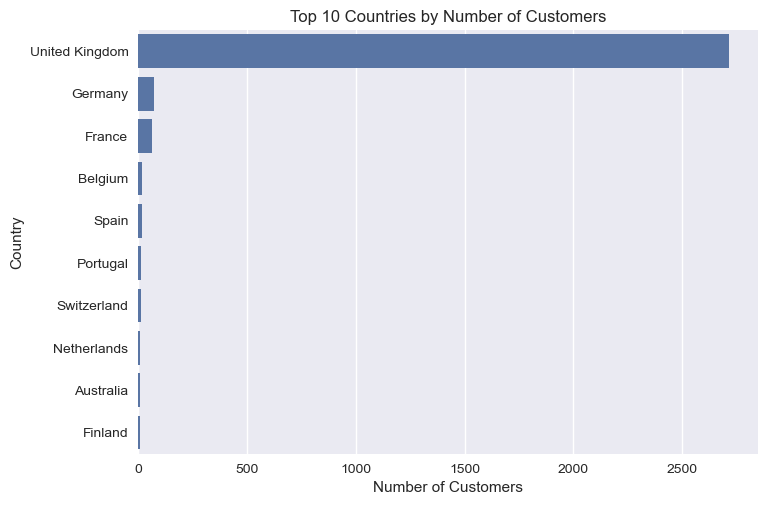

In [23]:
#number of customers per country

country_customers = data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head(10)
sns.barplot(x=country_customers.values, y=country_customers.index)
plt.title("Top 10 Countries by Number of Customers")
plt.xlabel("Number of Customers")
plt.savefig("../visuals/country_customers.png", dpi=150)
plt.show()


## Quantity / TotalPrice distribution

Helps spot outliers

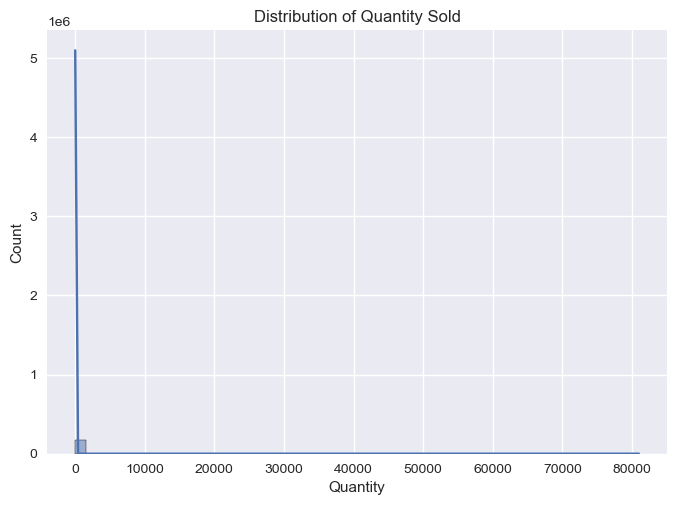

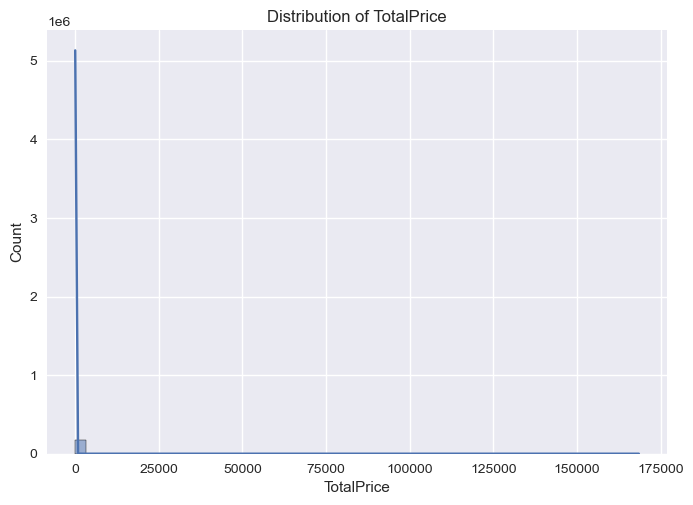

In [26]:
sns.histplot(data['Quantity'], bins=50, kde=True)
plt.title("Distribution of Quantity Sold")
plt.show()

sns.histplot(data['TotalPrice'], bins=50, kde=True)
plt.title("Distribution of TotalPrice")
plt.savefig("../visuals/distribution.png", dpi=150)
plt.show()
